#### Name: Asha Cumberbatch 
#### Date: March 11th

#### Title: Interest in Computer Science courses among Non-Majors at CCM

This program contains the analysis of the survey data for CCM students who did not major in a Computer Science degree but enrolled in a Computer Science course. This analysis focuseson their interest in taking another computer science class and attempting to isolate some factors that affect that interest.

#### Imports 
we first import the necessary libraries - matplotlib, numpy, pandas.
We'll also load in the previouly cleaned data from the csv file (subset)


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('subset.csv')

In [7]:
data

,age,more_classes,website_information,attended_openhouse,attended_instant_decision_day,attended_on_campus_information_session,attended_virtual_session,women_who_dare,college_fair,impact_previous_class,impact_previous_club,impact_competition,impact_afterschool_camp,impact_summer_camp,impact_ap_class,impact_dual_enrollment_class,impact_noncomputer_family_friend,impact_computer_family_friend,impact_teacher,employer_influence
0,19-20,2,Yes,Yes,Yes,No,No,No,Yes,No Impact,No Impact,High Impact,NaN,NaN,NaN,NaN,Some Impact,NaN,High Impact,NaN
1,19-20,3,No,No,No,No,No,No,No,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact
2,18 and younger,5,Don't recall,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure,Not Sure,NaN,NaN,No Impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19-20,3,No,Yes,No,No,No,No,No,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,19-20,3,No,No,No,No,No,No,No,Some Impact,No Impact,NaN,NaN,NaN,NaN,NaN,Some Impact,NaN,NaN,Some Impact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,21-24,3,Don't recall,No,No,No,No,No,No,Some Impact,Some Impact,No Impact,No Impact,Some Impact,Some Impact,High Impact,Some Impact,Some Impact,High Impact,No Impact
88,19-20,3,Don't recall,Yes,No,No,No,No,No,No Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,Some Impact,Some Impact,Some Impact
89,19-20,1,No,Yes,No,Yes,No,No,No,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
90,19-20,3,No,No,No,No,No,No,No,High Impact,Some Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,No Impact


#### Question 1 - What is the interest level for taking another computing class?
To delve into our data we first want to gauge how interesed students are in taking another computing class. The question that allows us to do this from our dataset is "On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?" 

We'll show this on a a bar chart, using our 1 to 5 scale to represent level of interest on the x axis and the proportion of students represented on the y axis. 

To show how frequently each level of interest occurs, we've selected the more_classes column from the dataset. The .value_counts function is applied to determine how many students are responding at each interest level, that is how many times each score occurs. The .sorting_index function is used to ensure that the counts are in ascending order, so they show in a way that makes sense on our graph.

In [10]:
interest_counts = data['more_classes'].value_counts().sort_index()
colors = ['red', 'orange', 'yellow', 'lightgreen', 'darkgreen']


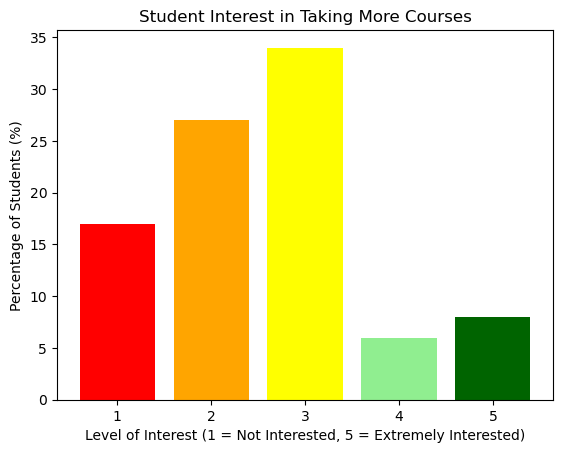

In [11]:
plt.bar(interest_counts.index, interest_counts.values, color=colors)
plt.title('Student Interest in Taking More Courses')
plt.xlabel('Level of Interest (1 = Not Interested, 5 = Extremely Interested)')
plt.ylabel('Percentage of Students (%)')
plt.show()


In [12]:
interest_counts

more_classes
1    17
2    27
3    34
4     6
5     8
Name: count, dtype: int64

#### Question 1 Results

We can see that most students (34) give a 3 for level of interest in taking another computer class. Additionally, the number of students indicating a low level of interest, assigning a score of 1 or 2, greatly outweighs those who show a greater level of interest at a score of 4 or 5. 

To get the count of exactly how many students fall into each category, we can print the interest_counts variable. With only 8 students extremely interested in additional computer classes it is important to do additional analysis on the data set to see if there are any trends that may indicate why desire to enroll in additional computing classes is low, and determine if there is anything that can be done.

 

#### Question 2 - Do younger students report being more interested in taking more computer science, Information Technology or game design courses than older students?
Now that we know how many total students are at each level of interest in taking additional classes, we can further dissect this to  see if there is any relationship between age and level of interest in taking additional computer classes.
We'll use the predetermined age ranges as the divisions for each age group on the x axis and show level of interest in a stacked bar chart.

We first create a summary of the age and interest in additional classes

In [16]:
age_interest_summary = data.groupby(['age', 'more_classes']).size().unstack(fill_value=0)
age_interest_summary

more_classes,1,2,3,4,5
age,,,,,
18 and younger,2,4,4,2,2
19-20,11,14,15,3,1
21-24,3,5,7,0,2
25-34,1,3,3,1,3
35-64,0,1,5,0,0


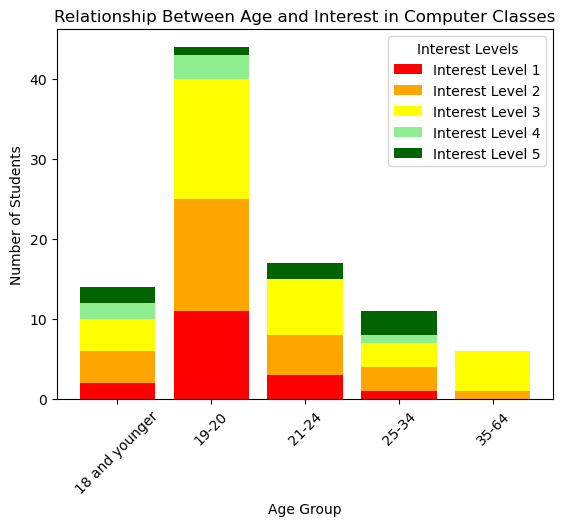

In [17]:
ages = (
    "18 and younger",
    "19-20",
    "21-24",
    "25-34",
    "35-64"
)
interest_level = {
    "Interest Level 1": np.array([2, 11, 3, 1, 0]),
    "Interest Level 2": np.array([4, 14, 5, 3, 1]),
    "Interest Level 3": np.array([4, 15, 7, 3, 5]),
    "Interest Level 4": np.array([2, 3, 0, 1, 0]),
    "Interest Level 5": np.array([2, 1, 2, 3, 0])
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(5)

color_index = 0
for interest, interest_level in interest_level.items():
    p = ax.bar(ages, interest_level, width, label=interest, bottom=bottom, color=colors[color_index])
    bottom += interest_level
    color_index += 1

plt.title('Relationship Between Age and Interest in Computer Classes')
plt.xlabel('Age Group')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title='Interest Levels')

plt.show()

In [19]:
age_count = data['age'].value_counts().sort_index()
age_count

age
18 and younger    14
19-20             44
21-24             17
25-34             11
35-64              6
Name: count, dtype: int64

#### Question 2 - Results
This barchart shows that students aged 19 to 20 made up the majority of respondents, at 44 students. It does not however show a significant increase or decrease in interest as  students age. This is not surprising given the overall level of interest, and the typical age group of a college.

#### Q3. Do younger students report attending more events hosted by the Information technology department than older students?
The majority of the student population is under 25. If there is a trend where younger students attend more events than older students the IT department can use that information to target and potentially foster interest in additional courses. 

To analyze this, we create a new variable called it_events, a list is made up of all the events the IT departments hosts. We'll create a new variable called events_attended and save this to the CSV file.

In [22]:
it_events = ['attended_openhouse', 'attended_instant_decision_day', 'attended_on_campus_information_session', 'attended_virtual_session', 'women_who_dare', 'college_fair']


In [23]:
data['Events_Attended'] = data[it_events].apply(lambda row: row.str.count('Yes').sum(), axis=1) # Count the number of yes responses across the events
data[['Events_Attended']].head()


,Events_Attended
0,3
1,0
2,0
3,1
4,0


In [ ]:
data.to_csv('subset_updated.csv', index=False)  # Saves the data frame to the subset file


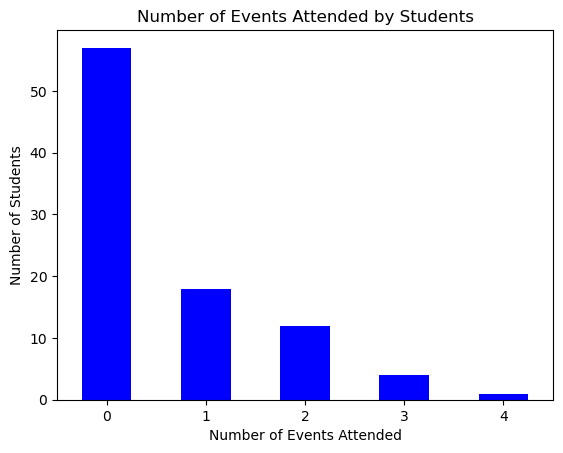

In [32]:
data['Events_Attended'].value_counts().sort_index().plot(kind='bar', color='blue') #this creates a barchart showing student attendance

plt.title('Number of Events Attended by Students')
plt.xlabel('Number of Events Attended')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

plt.show()

In [40]:
# groups the events_attended and more_classes column so we can count how many times each occurs
events_summary = data.groupby(['Events_Attended', 'more_classes']).size().unstack(fill_value=0)

events_summary


more_classes,1,2,3,4,5
Events_Attended,,,,,
0,10,14,23,4,6
1,2,5,9,1,1
2,3,5,2,1,1
3,2,2,0,0,0
4,0,1,0,0,0


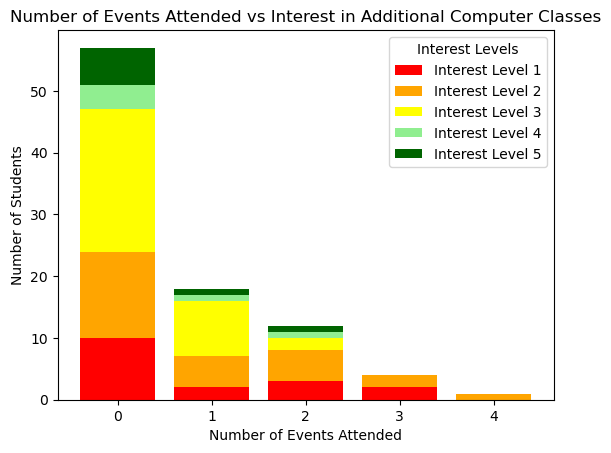

In [38]:
events = (
    "0",
    "1",
    "2",
    "3",
    "4"
)
interest_level = {
    "Interest Level 1": np.array([10, 2, 3, 2, 0]),
    "Interest Level 2": np.array([14, 5, 5, 2, 1]),
    "Interest Level 3": np.array([23, 9, 2, 0, 0]),
    "Interest Level 4": np.array([4, 1, 1, 0, 0]),
    "Interest Level 5": np.array([6, 1, 1, 0, 0])
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(5)

color_index = 0
for interest, interest_level in interest_level.items():
    p = ax.bar(events, interest_level, width, label=interest, bottom=bottom, color=colors[color_index])
    bottom += interest_level
    color_index += 1

plt.title('Number of Events Attended vs Interest in Additional Computer Classes')
plt.xlabel('Number of Events Attended')
plt.ylabel('Number of Students')
plt.legend(title='Interest Levels')
plt.show()

#### Question 3 Results
Those who reported not attending any events hosted by the IT department also reported that they were more interested in enrolling in another computer class than those who attended events. This is surprising, as more interaction and engagement with department events is usually associated with greater interest. It may mean that the department may have to update their activities to better capture the attention of potential computer science students.

#### Q4. Did students who reported receiving more information about computer courses from the CCM website also report being more interested in taking another computer class than those who did not (visit the website for additional information)?
Similiar to question 3, for this question we will check if students who visited the website were more interested in further classes than those who did not visit the site. 

In [42]:
website_summary = data.groupby(['website_information', 'more_classes']).size().unstack(fill_value=0) # Group by 'website_information' and 'more_classes'

website_summary


more_classes,1,2,3,4,5
website_information,,,,,
Don't recall,1,0,5,0,3
No,12,22,24,3,4
Yes,4,5,5,3,1


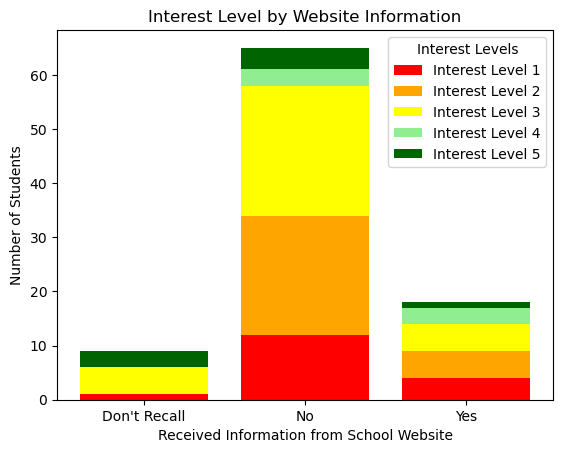

In [44]:
website_visited = (
    "Don't Recall",
    "No",
    "Yes"
)
interest_level = {
    "Interest Level 1": np.array([1, 12, 4]),
    "Interest Level 2": np.array([0, 22, 5,]),
    "Interest Level 3": np.array([5, 24, 5]),
    "Interest Level 4": np.array([0, 3, 3]),
    "Interest Level 5": np.array([3, 4, 1])
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(3)

color_index = 0
for interest, interest_level in interest_level.items():
    p = ax.bar(website_visited, interest_level, width, label=interest, bottom=bottom, color=colors[color_index])
    bottom += interest_level
    color_index += 1
plt.title('Interest Level by Website Information')
plt.xlabel('Received Information from School Website')
plt.ylabel('Number of Students')
plt.legend(title='Interest Levels')
plt.show()

#### Results of Question 4
Only one student who visited the website before enrolling at the college gives a score of 5 for interest in taking additional computer classes. This indicates that it is not the school website that is fostering interest in additional courses. It is however worth noting that less than 20 students reported that they visited the website. There may be an opportunity for the department to revamp the website as part of their engagement efforts. The department could focus on making the website more interactive, possibly showing some of the things students may come across or learn in some of their classes. It may not be enough to sway students who rate their interest in additional classes at a 1, but those with an interest level of 3 or 4 may be persuaded to at register for additional classesd.

#### Summary and Reccomendations

Non-majoring students among each age group consistently reported little interest in taking adititonal Computer Science classes. This is consistent among all age groups with desire to enroll in another class being lowest among students who did not visit the school's website before enrollment. Further, those who did not attend any events hosted by the IT department, were more interested in taking another class than those who did, or did not recall whether they visited. 

The most urgent need to be addressed by the IT department appears to be their engagement with potential students. Those who engaged with the department's events or visited the website seemed to have less interest than those who didn't. It may be beneficial to change the events to be more interactive, or place a greater focus on how the skills used in these classes may be applied to other fields. 

The department may also benefit from making the website more interactive. Students should be able to get a demo of what they can expect to learn in some of their classes froom the website. 

Efforts should focus primarily around students 19 to 20 as they make up the largest age group from the sample.